## Unit 13.10: Reloading and Verifying the Professional Dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 1. අලුත් සහ නිවැරදි Dataset එක Load කිරීම
file_path = '../data/aura_fitness_final.csv'
df = pd.read_csv(file_path)


In [5]:
# 2. දත්තවල මූලික තොරතුරු බලමු
print("--- Dataset Information ---")
df.info()

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User_ID          5000 non-null   object 
 1   Age              5000 non-null   int64  
 2   Gender           5000 non-null   object 
 3   Daily_Steps      4758 non-null   float64
 4   Workout_Min      4735 non-null   float64
 5   Calories_Burned  4741 non-null   float64
 6   Sleep_Hrs        4763 non-null   float64
 7   Protein_Intake   4758 non-null   float64
 8   Water_Intake     4756 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
# 3. හිස් තැන් (NaN) ප්‍රමාණය පරීක්ෂා කරමු
print("\n--- Missing Values Count ---")
df.isnull().sum()


--- Missing Values Count ---


User_ID              0
Age                  0
Gender               0
Daily_Steps        242
Workout_Min        265
Calories_Burned    259
Sleep_Hrs          237
Protein_Intake     242
Water_Intake       244
dtype: int64

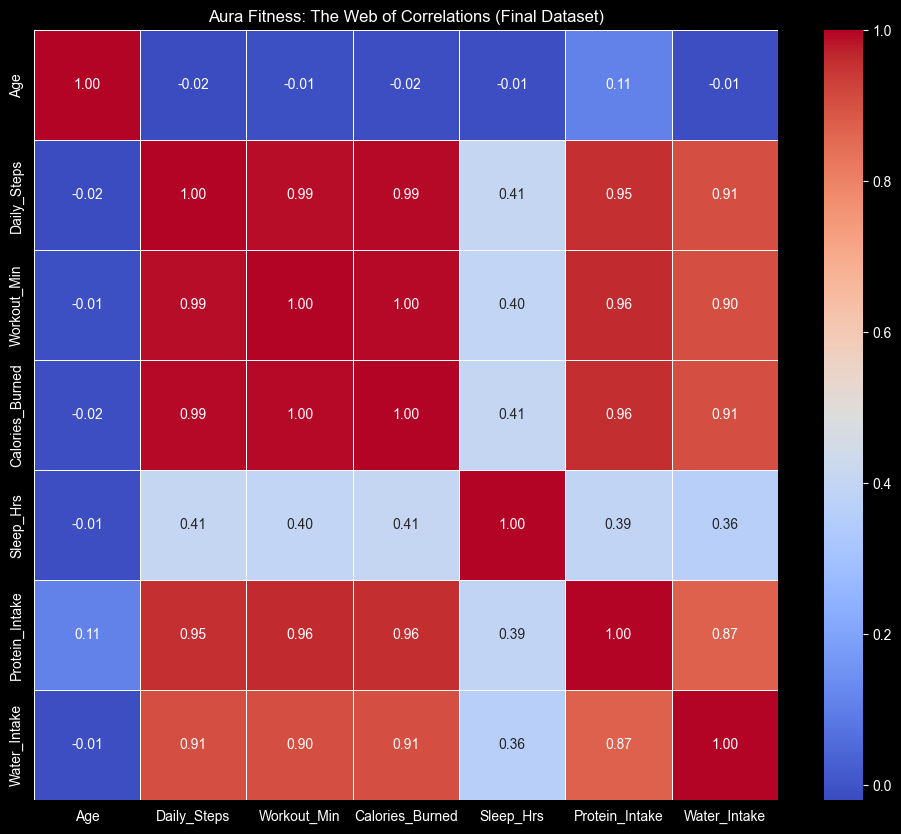

In [7]:
# සංඛ්‍යාත්මක දත්ත පමණක් වෙන් කර ගැනීම
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Heatmap එක ඇඳීම
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Aura Fitness: The Web of Correlations (Final Dataset)')
plt.show()

## 💼 Interview Question
- ප්‍රශ්නය: "EDA එකකදී දත්ත අතර සහසම්බන්ධතාවය (Correlation) බැලීමෙන් අපිට ලැබෙන ලොකුම ප්‍රයෝජනය කුමක්ද?"
- පිළිතුර: එමගින් අපිට AI Model එකක් හදද්දී වැදගත්ම වන Features (විචල්‍යයන්) හඳුනා ගන්න පුළුවන්. උදාහරණයකට, කැලරි දහනය අනාවැකි පළ කිරීමට 'Steps' සහ 'Workout_Min' යන දෙකම ඉතා වැදගත් බව Heatmap එකෙන් අපිට තහවුරු වෙනවා.

## 📊 Missing Data Visualization (The NaN Map)

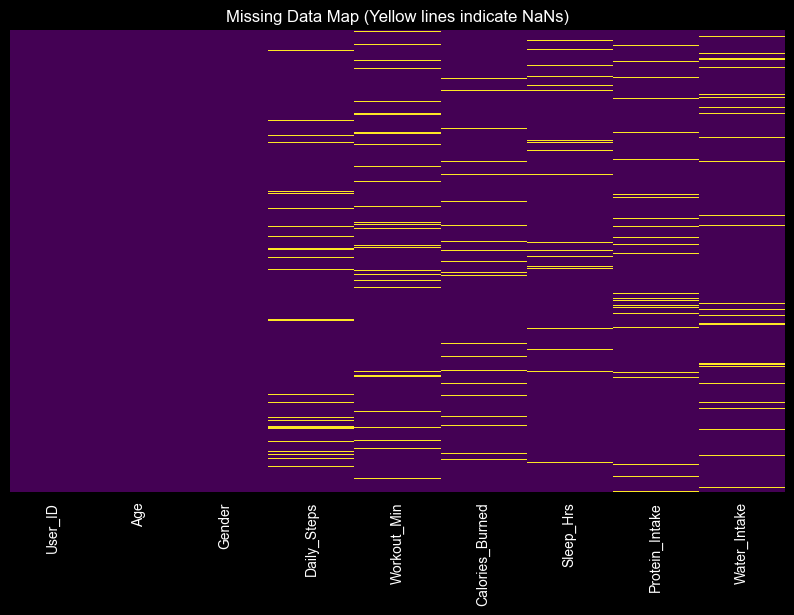

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Map (Yellow lines indicate NaNs)')
plt.show()

## 💼 Interview Question (Professional Standard)
- ප්‍රශ්නය: "සහසම්බන්ධතාවය (Correlation) ඉතා වැඩි විචල්‍යයන් දෙකක් (උදා: $0.99$) ඔයාගේ AI model එකක තියෙනවා නම්, එයින් ඇති විය හැකි  ගැටලුව කුමක්ද?"
- පිළිතුර: මෙයට Multicollinearity ලෙස හඳුන්වයි. විචල්‍යයන් දෙකක් එක හා සමානවම හැසිරෙනවා නම්, model එකට ඒ දෙකෙන් වඩා වැදගත් වන්නේ කුමක්දැයි හඳුනා ගැනීමට අපහසු විය හැක. එවැනි අවස්ථාවක බොහෝ විට එක් විචල්‍යයක් පමණක් තබා ගනී.

## Unit 13.11: Advanced Data Cleaning - Preserving Correlations

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 1. සංඛ්‍යාත්මක දත්ත පමණක් තෝරා ගනිමු
numeric_cols = ['Age', 'Daily_Steps', 'Workout_Min', 'Calories_Burned', 'Sleep_Hrs', 'Protein_Intake', 'Water_Intake']
df_numeric = df[numeric_cols]

# 2. Smart Imputer එක සකස් කරමු (සම්බන්ධතා පදනම් කරගත් පිරවීම)
imputer = IterativeImputer(random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numeric_cols)

# 3. පිරිසිදු කළ දත්ත මුල් DataFrame එකට එකතු කරමු
df[numeric_cols] = df_imputed

# 4. අවසාන පරීක්ෂාව
print("Cleaning කිරීමෙන් පසු හිස් තැන්:")
print(df.isnull().sum())


Cleaning කිරීමෙන් පසු හිස් තැන්:
User_ID            0
Age                0
Gender             0
Daily_Steps        0
Workout_Min        0
Calories_Burned    0
Sleep_Hrs          0
Protein_Intake     0
Water_Intake       0
dtype: int64


## 💼 Interview Question (Pro Level)

- ප්‍රශ්නය: "සහසම්බන්ධතාවය 0.9 ට වැඩි දත්ත පද්ධතියක Median Imputation වලට වඩා Multivariate Imputation (උදා: Iterative) සුදුසු ඇයි?"
- පිළිතුර: Median Imputation මගින් දත්තවල විචලනය (Variance) අඩු කරන අතර විචල්‍යයන් අතර පවතින රේඛීය සම්බන්ධතාවය (Linear Relationship) විකෘති කරයි. Multivariate Imputation මගින් අනෙකුත් විචල්‍යයන්ගේ සහය ඇතිව වඩාත් තාත්වික අගයක් ලබා දෙන බැවින් දත්තවල ගුණාත්මකභාවය ආරක්ෂා වේ.

## Unit 13.12: Multivariate Analysis & Pairplots

Pairplot එක සකස් වෙමින් පවතී... ⏳


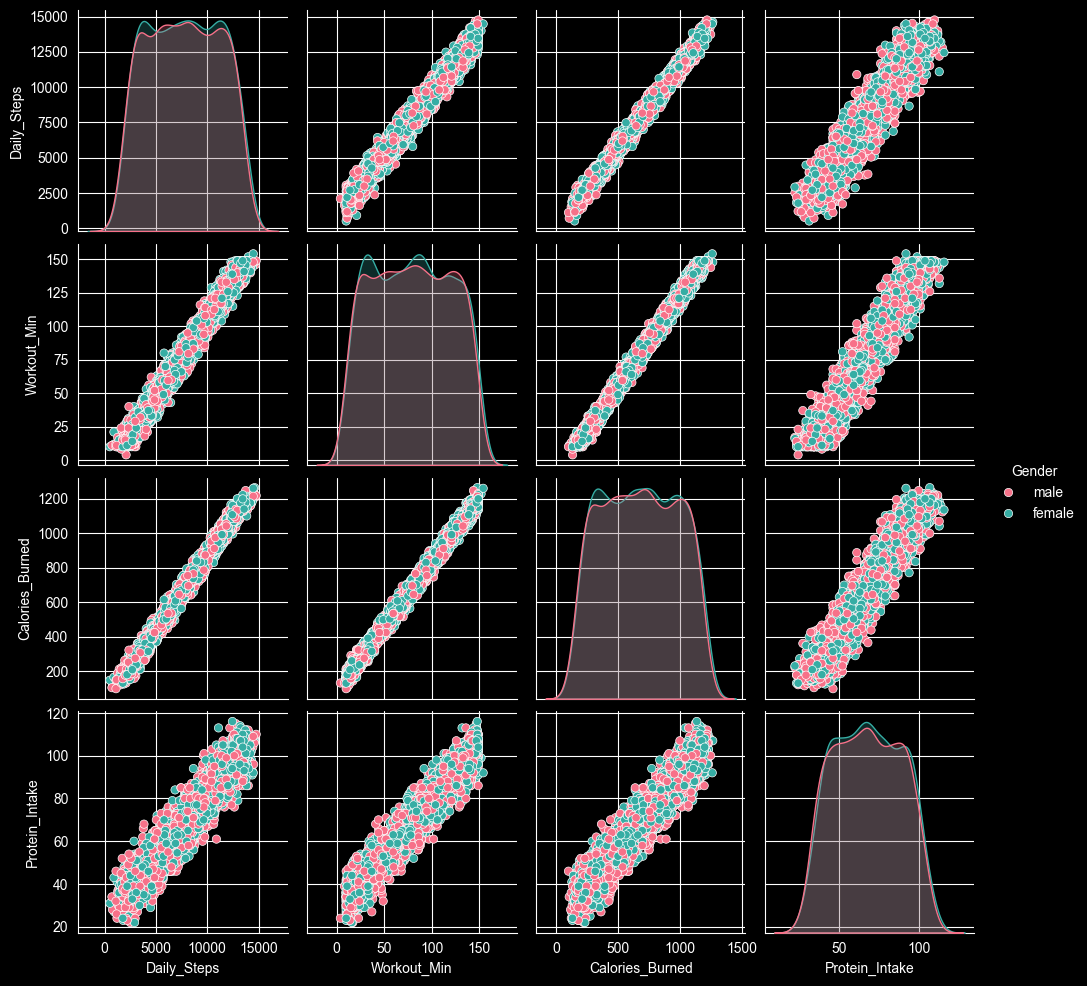

In [10]:
# 1. පිරිසිදු කළ දත්තවල ඇති සම්බන්ධතා එකවර බැලීම
# කාලය ඉතිරි කර ගැනීමට වැදගත් columns කිහිපයක් පමණක් තෝරා ගනිමු

target_cols = ['Daily_Steps', 'Workout_Min', 'Calories_Burned', 'Protein_Intake', 'Gender']

print("Pairplot එක සකස් වෙමින් පවතී... ⏳")
sns.pairplot(df[target_cols], hue='Gender', diag_kind='kde', palette='husl')
plt.show()

## ⚠️ Common Errors (පරෙස්සම් වෙන්න!)
- High Memory Usage: Dataset එකේ පේළි 5,000 ක් සහ Columns ගොඩක් තියෙන නිසා, pairplot එක අඳින්න පොඩි වෙලාවක් යන්න පුළුවන්. ඔයාගේ ලැප් එක හිර වෙනවා වගේ නම් df.sample(500) පාවිච්චි කරලා කුඩා කොටසක් පමණක් අඳින්න.

- Non-Numeric Columns: Pairplot එකට ලබා දෙන්නේ ඉලක්කම් සහිත Columns පමණයි (Hue එක සඳහා පමණක් Category එකක් දිය හැකියි).

## 💼 Interview Question (Professional Standard)

- ප්‍රශ්නය: "EDA එකකදී Heatmap එකක් තිබියදීත් Pairplot එකක් අඳින්නේ ඇයි?"
- පිළිතුර: Heatmap එකෙන් ලැබෙන්නේ සහසම්බන්ධතාවයේ අගය (Correlation Coefficient) පමණයි. නමුත් Pairplot එකෙන් දත්ත බෙදී ඇති ආකාරය (Distribution) සහ එහි ඇත්තටම Outliers තියෙනවාද යන්න ඇස් දෙකෙන් බලා ගැනීමට පුළුවන්.

# Outlier Detection

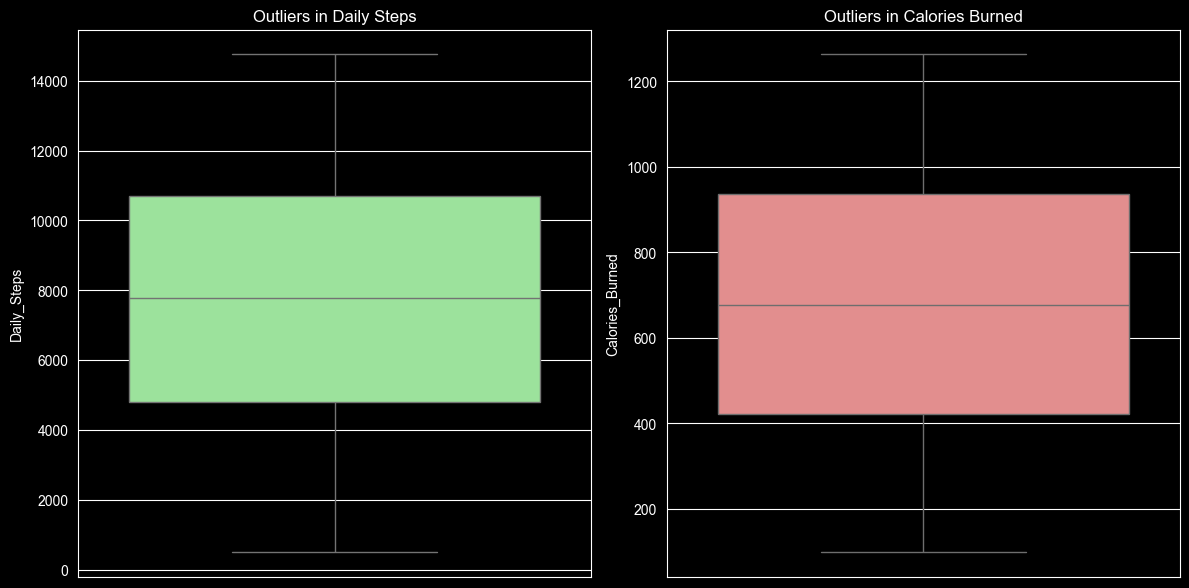

In [19]:
plt.figure(figsize=(12, 6))

# පියවර ගණන සහ කැලරි දහනය සඳහා Box plot දෙකක් ඇඳීම
plt.subplot(1,2,1)
sns.boxplot(y=df['Daily_Steps'], color='lightgreen')
plt.title('Outliers in Daily Steps')

plt.subplot(1,2,2)
sns.boxplot(y=df['Calories_Burned'], color='lightcoral')
plt.title('Outliers in Calories Burned')

plt.tight_layout()
plt.show()

## 💼 Interview Question (Outliers ගැන)
- ප්‍රශ්නය: "ඔයාගේ Dataset එකේ Outliers තියෙනවා නම්, ඔයා ඒවා අනිවාර්යයෙන්ම ඉවත් කරනවාද?"
- පිළිතුර: නැත. මුලින්ම ඒ Outlier එක ආවේ කොහොමද කියලා බලන්න ඕනේ. ඒක පද්ධතියේ දෝෂයක් (Measurement Error) නම් ඉවත් කරනවා. නමුත් ඒක සැබෑ දුර්ලභ අවස්ථාවක් නම්, එය තබා ගැනීමෙන් අපේ model එකට තවත් අලුත් දෙයක් ඉගෙන ගන්න අවස්ථාව ලැබෙනවා.

# Feature Engineering

### 📝 පදනම් කරගන්නා නිර්ණායක (Logic)
- Sedentary: පියවර 5,000 ට අඩු.

- Moderate: පියවර 5,000 - 10,000 අතර.

- Active: පියවර 10,000 - 15,000 අතර.

- Very Active: පියවර 15,000 ට වැඩි.

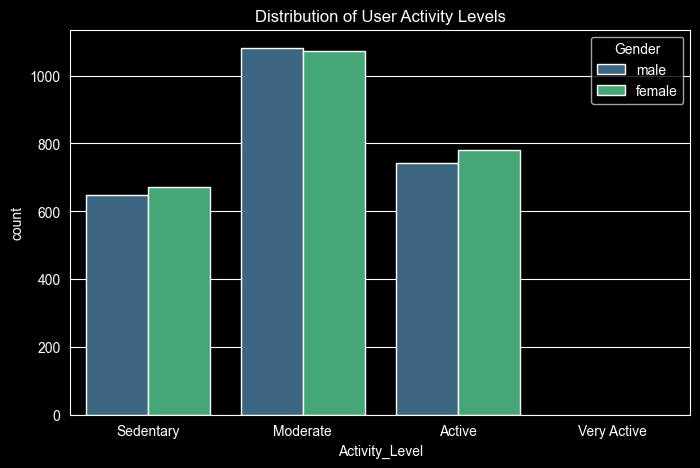

In [33]:
# 1. Activity_Level තීරණය කිරීමට function එකක් ලියමු
def categorize_activity(steps):
    if steps < 5000:
        return 'Sedentary'
    elif 5000 <= steps < 10000:
        return 'Moderate'
    elif 10000 <= steps < 15000:
        return 'Active'
    else:
        return 'Very Active'

# 2. අලුත් Column එක නිර්මාණය කිරීම
df['Activity_Level'] = df['Daily_Steps'].apply(categorize_activity)

# 3. අලුත් Feature එකේ ව්‍යාප්තිය බලමු
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='Activity_Level', palette='viridis',
              order=['Sedentary', 'Moderate', 'Active', 'Very Active'], hue='Gender')

plt.title('Distribution of User Activity Levels')
plt.show()

## 💼 Interview Question (Feature Engineering ගැන)
- ප්‍රශ්නය: "Machine Learning Model එකකට දත්ත ලබා දීමට පෙර Feature Engineering කිරීම වැදගත් වන්නේ ඇයි?"
- පිළිතුර: Model එකකට දත්තවල ඇති සංකීර්ණ රටාවන් (Patterns) තේරුම් ගැනීමට වඩාත් පහසු වන ලෙස දත්ත සකස් කර දීම මෙහිදී සිදු වේ. බොහෝ විට Raw Data වලට වඩා හොඳින් සකස් කළ Features පාවිච්චි කිරීමෙන් Model එකේ නිරවද්‍යතාවය (Accuracy) වැඩි කරගත හැක.